In [1]:
import numpy as np     # scientific calculation
import pandas as pd    # handle csv file
import seaborn as sns  # visualize 
import matplotlib.pyplot as plt # plotting

In [2]:
df =pd.read_csv('RFM_clear.csv')

In [3]:
df['RFM_Score'] = df.R.astype(str)+ df.F.astype(str) + df.M.astype(str)
df.drop(df.tail(1).index,inplace=True)
df

,CustomerID,InvoiceDate,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,...,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY,All,recency,frequency,monetary,R,F,M,RFM_Score
0,12347.0,2011/12/7,0,0,0,0,0,0,0,0,...,0,0,11,2.0,7.0,4310.00,5,1,1,511
1,12348.0,2011/9/25,0,0,0,0,0,0,0,0,...,0,0,3,75.0,4.0,1797.24,2,2,2,222
2,12349.0,2011/11/21,0,0,0,0,0,0,0,0,...,0,0,73,18.0,1.0,1757.55,4,5,2,452
3,12350.0,2011/2/2,0,0,0,0,0,0,0,0,...,0,0,17,310.0,1.0,334.40,1,5,4,154
4,12352.0,2011/11/3,0,0,0,0,0,0,0,0,...,0,0,15,36.0,7.0,1545.41,3,1,2,312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4365,18278.0,2011/9/27,0,0,0,0,0,0,0,0,...,0,0,9,73.0,1.0,173.90,2,5,5,255
4366,18280.0,2011/3/7,0,0,0,0,0,0,0,0,...,0,0,10,277.0,1.0,180.60,1,5,5,155
4367,18281.0,2011/6/12,0,0,0,0,0,0,0,0,...,0,0,7,180.0,1.0,80.82,1,5,5,155
4368,18282.0,2011/12/2,0,0,0,0,0,0,0,0,...,0,0,5,7.0,3.0,176.60,5,3,5,535


In [4]:
df1 = df.loc[:,'R':'M']

In [5]:
df1

,R,F,M
0,5,1,1
1,2,2,2
2,4,5,2
3,1,5,4
4,3,1,2
...,...,...,...
4365,2,5,5
4366,1,5,5
4367,1,5,5
4368,5,3,5


In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # matplotlib 3.2.0 後可省略
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [7]:
wcss = []
# 計算 k=1~10 的損失函數
for i in range(1,27):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(df1)
    # kmeans.inertia_
    wcss.append(kmeans.inertia_)

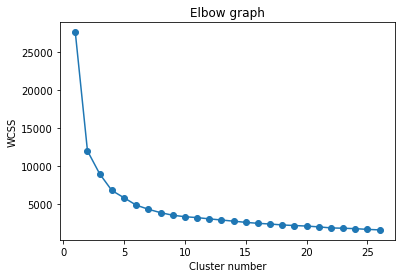

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt 

plt.plot(range(1,27), wcss, marker='o')
plt.title('Elbow graph')
plt.xlabel('Cluster number')
plt.ylabel('WCSS')
plt.show()

In [9]:
wcss[10]

3210.3639406056072

In [10]:
# 10 clusters

kmeans = KMeans(n_clusters=10, init='k-means++', random_state=0)
df1['clusters'] = kmeans.fit_predict(df1)
print(round(pd.DataFrame(kmeans.cluster_centers_),2))

      0     1     2
0  1.31  4.82  5.00
1  4.47  2.44  2.36
2  2.18  2.51  3.38
3  2.38  2.19  1.66
4  2.28  4.39  2.52
5  4.46  4.26  3.83
6  1.31  4.64  3.81
7  3.72  1.15  1.23
8  3.25  4.71  4.62
9  5.00  1.12  1.15


In [12]:
df1['CustomerID'] = df['CustomerID']

In [17]:
df1.sort_values('clusters', inplace = True)

In [19]:
# No.1 loyal customers
# give them some benifit and they will buy more
df1[df1.clusters== 5]

,R,F,M,clusters,CustomerID
2494,5,4,4,5,15714.0
1245,5,4,3,5,14023.0
4180,5,4,5,5,18030.0
3687,4,4,3,5,17360.0
762,5,5,4,5,13349.0
...,...,...,...,...,...
196,4,4,3,5,12589.0
4152,4,5,3,5,17985.0
3706,4,4,4,5,17384.0
2041,4,5,4,5,15115.0


In [20]:
# No.2 loyal customers
# give them some benifit and they will buy more
df1[df1.clusters== 8]

,R,F,M,clusters,CustomerID
2453,3,5,4,8,15659.0
82,3,5,4,8,12448.0
1789,3,4,4,8,14764.0
1960,3,5,5,8,15017.0
2457,3,4,4,8,15664.0
...,...,...,...,...,...
1162,3,4,4,8,13904.0
1166,3,4,4,8,13917.0
356,3,5,5,8,12789.0
1177,3,4,4,8,13930.0


In [22]:
# potential customers
# they used to buying a lot, but they buy less lately
# maybe we can sand some notification message to them
df1[df1.clusters== 0]

,R,F,M,clusters,CustomerID
852,1,5,5,0,13482.0
1505,1,5,5,0,14386.0
2485,1,5,5,0,15703.0
2487,1,5,5,0,15705.0
2491,1,5,5,0,15709.0
...,...,...,...,...,...
4154,1,5,5,0,17987.0
1739,1,5,5,0,14697.0
2015,1,5,5,0,15083.0
3153,1,5,5,0,16617.0
